<a href="https://colab.research.google.com/github/gd1m3y/py-projects/blob/master/iris_sepcies_classifier_usingpytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!unzip iris\ \(1\).zip

Archive:  iris (1).zip
  inflating: Iris.csv                
  inflating: database.sqlite         


#preprocessing the data



In [0]:
import pandas as pd

In [0]:
data = pd.read_csv('/content/Iris.csv')

In [6]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
#no of classes

data.groupby('Species').count()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,50,50,50,50,50
Iris-versicolor,50,50,50,50,50
Iris-virginica,50,50,50,50,50


In [0]:
#sperating the features with labels

X = data.iloc[:,:-1]
Y = data.iloc[:,-1]



In [0]:
#since our labels consist of categorical values we should convert them
#to usable values using label encoder

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

Y_trans = pd.DataFrame(encoder.fit_transform(Y))

#retaining column names since column names are lost after label encoding
Y_trans.columns = Y.to_frame().columns

In [17]:
# our labels are converted into respective numeric values
Y_trans.groupby('Species').count()

""
Species
0
1
2


In [0]:
#splitting into train and test data 
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,Y_trans,random_state=0)


In [38]:
x_train = torch.tensor( x_train).float()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.


In [39]:
x_train.shape

torch.Size([112, 5])

In [0]:
x_test = torch.tensor(x_test.values).float()

# using deep neural net

In [0]:
import torch 
from torch import optim
from torch import nn

In [0]:
#defining the model

model = nn.Sequential(nn.Linear(5,32),nn.ReLU(),nn.Linear(32,16),nn.ReLU(),
                      nn.Linear(16,8),nn.ReLU(),nn.Linear(8,3))



In [0]:
optimizer = optim.Adam(model.parameters())

In [0]:
criterion = nn.CrossEntropyLoss()

In [77]:
import numpy as np
Epochs = 100
train_loss =[]
test_loss =[]
for i in range(Epochs):
  optimizer.zero_grad()
  logits = model(x_train)
  loss = criterion(logits,torch.tensor(y_train.values.ravel()))
  loss.backward()
  optimizer.step()
  train_loss.append(loss.item())
  with torch.no_grad():
    logits = model(x_test)
    loss = criterion(logits,torch.tensor(y_test.values.ravel()))
    test_loss.append(loss)
    if i%25 == 0 :
      ps = torch.exp(logits)  
      top_p, top_class = ps.topk(1, dim=1)
      # Look at the most likely classes for the first 10 examples
      results = top_class == torch.tensor(y_test.values)
      accuracy = torch.mean(results.type(torch.FloatTensor))
print(accuracy.item()*100)

97.36841917037964


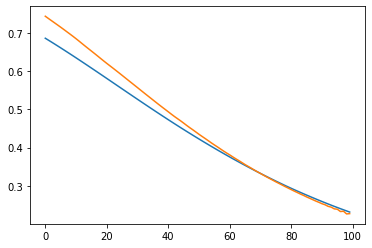

In [64]:
import matplotlib.pyplot as plt 

plt.plot(train_loss)
plt.plot(test_loss)
plt.show()


In [0]:
#we can see that we can get a accuracy of 97 with the deep neural nets

In [0]:
!mkdir colab-notebooks

In [2]:
%cd colab-notebooks

/content/colab-notebooks


Initialized empty Git repository in /content/colab-notebooks/.git/
